# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [3]:
def seasons_india(month):
    if month in [12, 1, 2]:
        return 1   # Winter
    elif month in [3, 4, 5]:
        return 2   # Summer
    elif month in [6, 7, 8, 9]:
        return 3   # Monsoon
    else:
        return 4   # Post-monsoon

df['indian_season'] = df['month'].map(seasons_india)


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [4]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

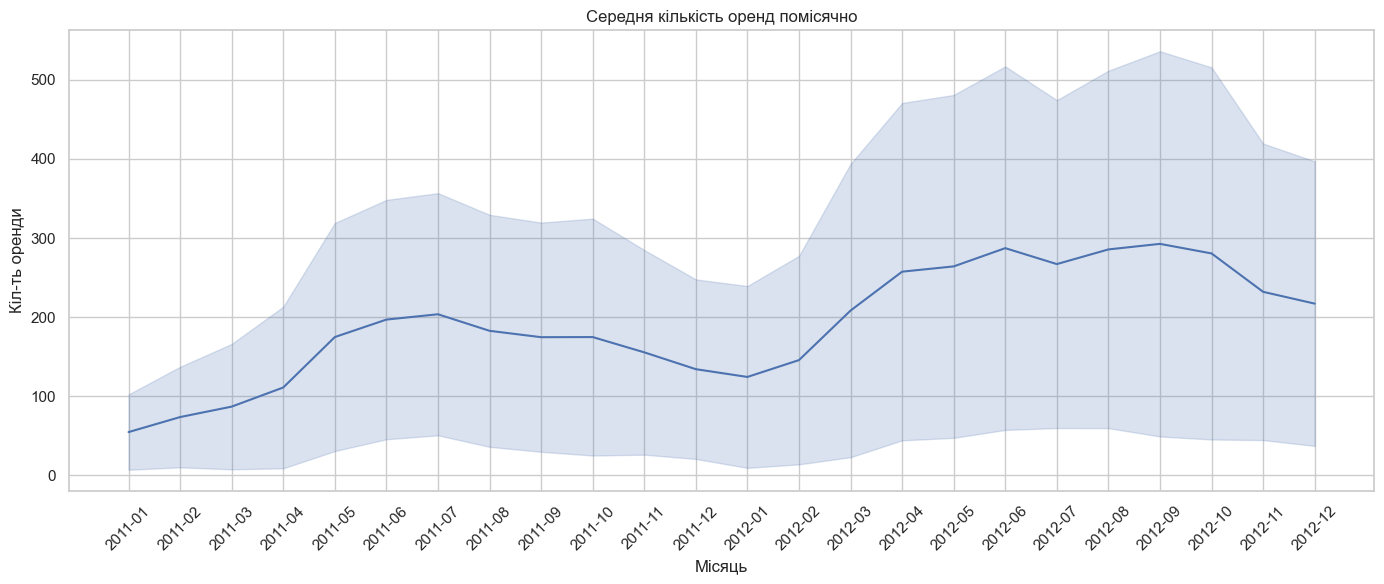

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='month_year', y='count', errorbar=('sd', 1))
plt.title('Середня кількість оренд помісячно')
plt.xlabel('Місяць')
plt.ylabel('Кіл-ть оренди')
plt.xticks(rotation=45)
plt.tight_layout();

**Відповідь:**  
*В які місяці найбільша невизначеність в даних?*  
Візуально найбільша невизначеність в період з 2012-08 по 2012-10

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

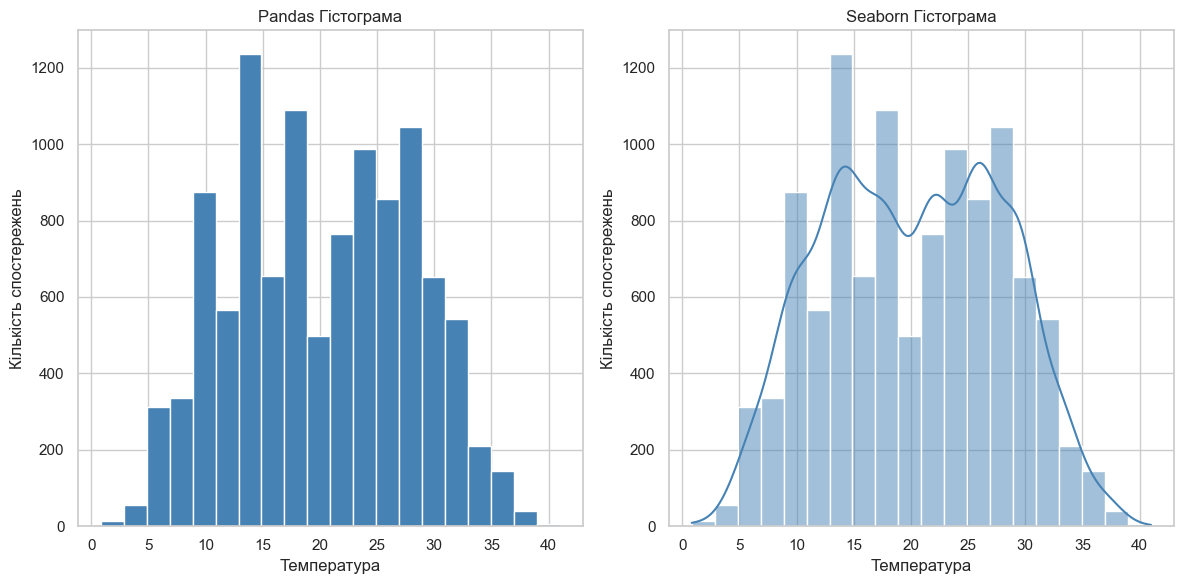

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Pandas
axes[0].hist(df['temp'], bins=20, color='steelblue')
axes[0].set(
    title='Pandas Гістограма',
    xlabel='Температура',
    ylabel='Кількість спостережень'
)

#Seaborn
sns.histplot(data=df, x='temp', bins=20, kde=True, color='steelblue', ax=axes[1])
axes[1].set(
    title='Seaborn Гістограма',
    xlabel='Температура',
    ylabel='Кількість спостережень'
)

plt.tight_layout()
plt.show()


**Відповіді**  
1. *Яка візуальна різниця між Pandas та Seaborn гістограмами?*  
Pandas гістограма: класичний стовпчиковий графік, лише біни, без додаткових ліній, більш базовий вигляд.  
Seaborn гістограма: приємніший стиль, прозоріші стовпчики, можливість додати kde-лінію.
2. *Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?*  
Це KDE-лінія - це крива, яка показує розподіл і є альтернативою гістограмі. Візуально краще зрозуміти розподіл за допомогою цієї лінії.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

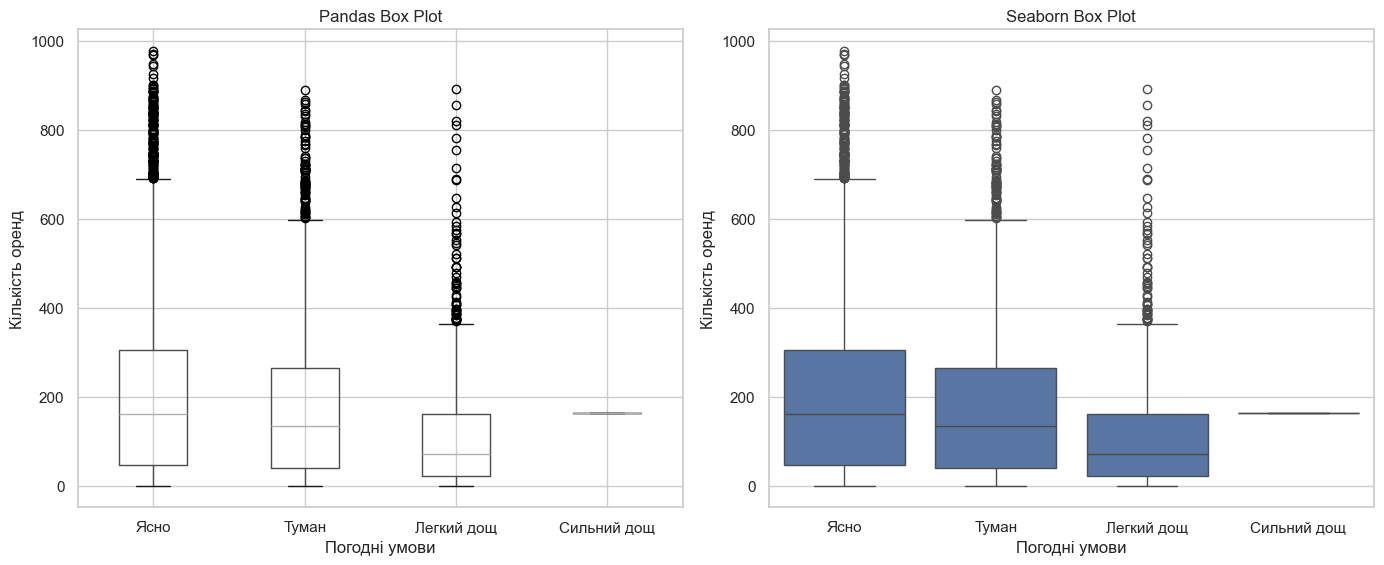

In [7]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_label'] = df['weather'].map(weather_map)

order = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
df['weather_label'] = pd.Categorical(df['weather_label'], categories=order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pandas Box Plot
df.boxplot(
    column='count',
    by='weather_label',
    ax=axes[0]
)

axes[0].set(
    title='Pandas Box Plot',
    xlabel='Погодні умови',
    ylabel='Кількість оренд'
)
axes[0].tick_params(axis='x')

plt.suptitle("")

# Seaborn Box Plot
sns.boxplot(
    data=df,
    x='weather_label',
    y='count',
    order=order,
    ax=axes[1]
)

axes[1].set(
    title='Seaborn Box Plot',
    xlabel='Погодні умови',
    ylabel='Кількість оренд'
)
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


**Відповідь:**  
*Яка візуальна різниця між Pandas та Seaborn бокс-плотами?*  
Pandas: будує простий мінімалістичний box plot без кольорового оформлення, лише контури. Підійде для швидкого перегляду.  
Seaborn: автоматично додає кольорове заповнення та приємніший дизайн. Виглядає більш презентабельно.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [8]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()


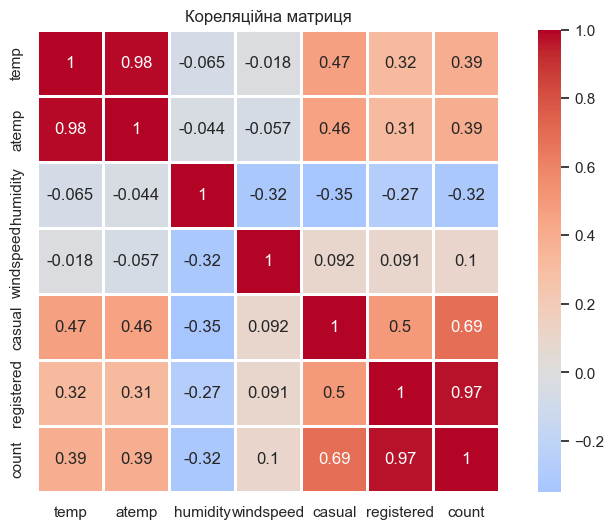

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidth=1)
plt.title('Кореляційна матриця')
plt.show()


**Відповіді:**  
1. *Які змінні найсильніше корелюють з загальною кількістю оренди (count)?*  
Найвища кореляція з count у registered - 0.97 - найсильніший зв'язок, тобто найбільше на кількість оренди впливає кількість зареєстрованих користувачів.
Далі, casual - кореляція становить 0.69. І temp та atemp мають однакову кореляцію - 0.39.
2. *Яка кореляція між temp та atemp? Чому?*  
Кореляція становить 0.98. atemp - це відчутна температура, яка базується на основі фактичної температури, тому змінні майже дублюють одна одну.
3. *Які змінні мають негативну кореляцію?*  
Негатнивну кореляцію мають:
- humidity-casual (–0.35)
- humidity-count (-0.32)
- humidity-windspeed (–0.32)
- humidity-registered (–0.27)  
Найсильніше негативно пов'язана вологість. Чим більша вологість, тим менше людей орендують велосипеди. Також вологість має негативну кореляцію зі швидкістю вітру.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


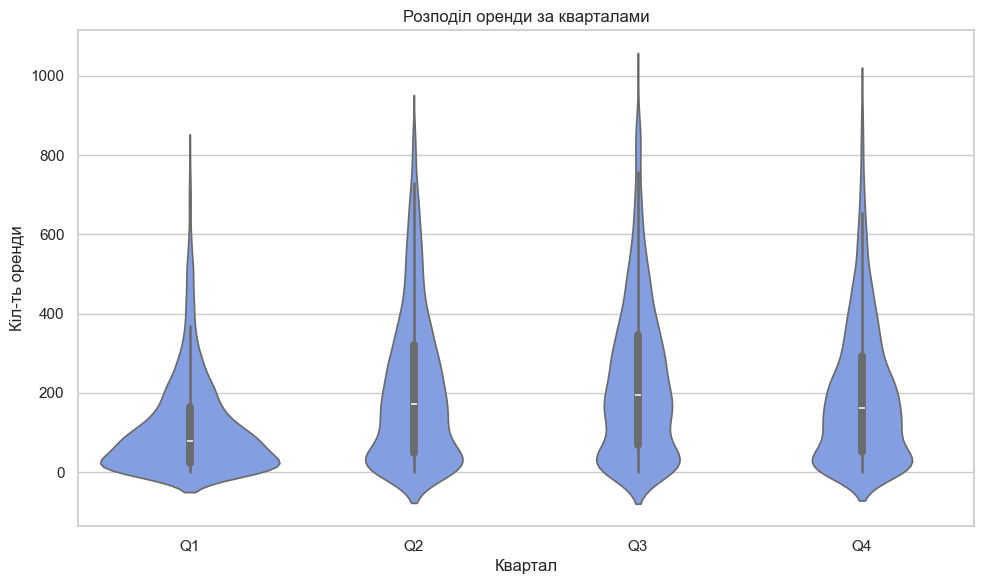

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df, x='season', y='count', color="#7598F0")

ax.set_title('Розподіл оренди за кварталами')
ax.set_xlabel('Квартал')
ax.set_ylabel('Кіл-ть оренди')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

plt.tight_layout()
plt.show()


**Відповіді:**  
1. *Що показує "товщина" violin plot?*  
Товщина показує густину розподілу даних. Чим ширше "скрипка", тим більше спостережень припадає на цей діапазон значень.
2. *В якому кварталі найбільша варіабельність оренди?*  
Найбільша варібельність у Q3. "Скрипка" є найдовшою, що вказує на широкий діапазон значень, а також має ширшу форму у середніх значеннях.
3. *Яка перевага violin plot над звичайним box plot?*  
Violin plot показує не лише медіану та квартилі, а повну форму розподілу. Це дозволяє бачити густину значень, наявність кількох піків та сам розподіл.


## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

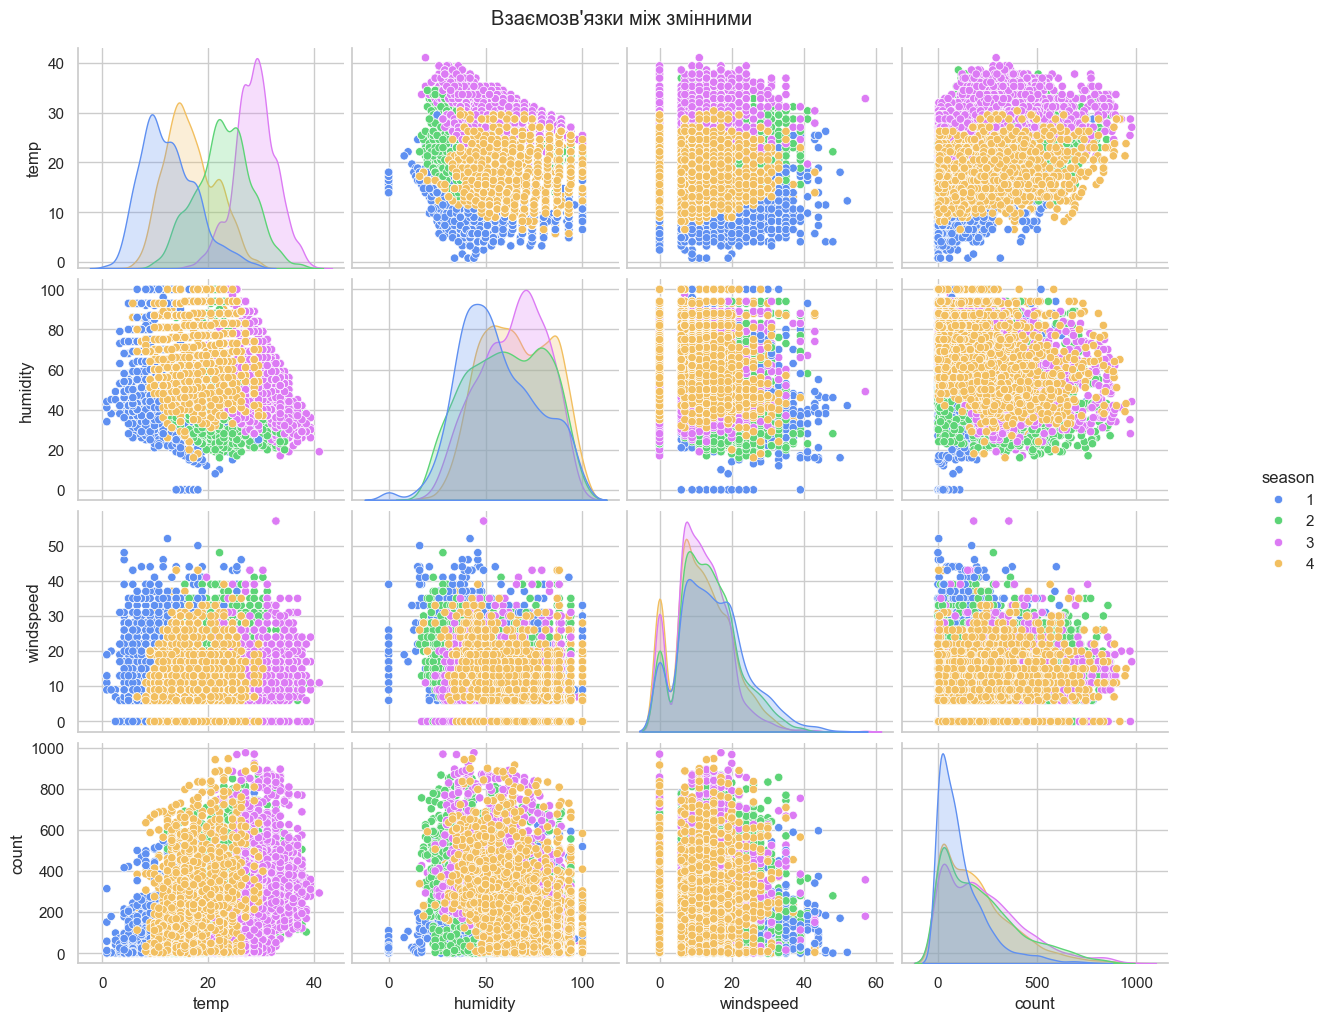

In [11]:
palette = ["#5F90F1", "#5DD477", "#DC7BF4", "#F2BF60"]

sample_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']]
g = sns.pairplot(sample_df, hue='season', palette = palette, height=2.5, aspect=1.2)
g._legend.set_bbox_to_anchor((1.05, 0.5))

plt.suptitle("Взаємозв'язки між змінними", y=1.02)
plt.show()


**Відповіді:**  
1. *Між якими змінними спостерігається найсильніший лінійний зв'язок?*  
Найчіткіше лінійний зв'язок видно між температурою та кількістю оренди - зі зростанням температури кількість оренд загалом збільшується.
2. *Яка характеристика найбільше відрізняється між кварталами?*  
Найбільше між кварталами відрізняється температура - її розподіли майже не перекриваються (взимку вона найнижча, влітку найвища, а весна і осінь знаходяться посередині)

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

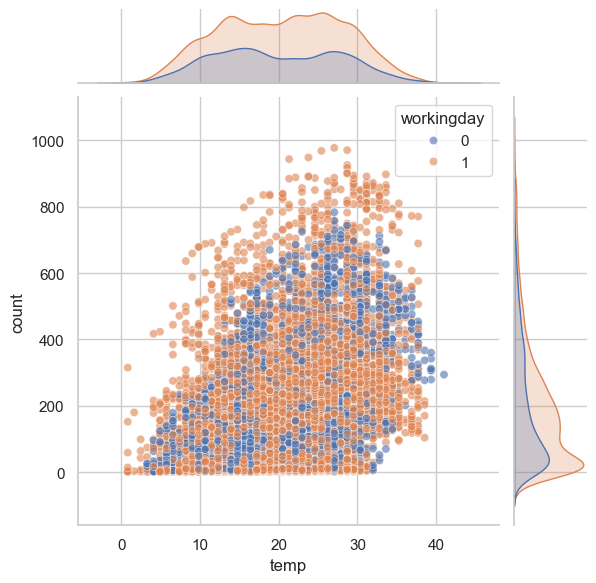

In [12]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday', alpha=0.6);

**Відповіді:**  
1. *Що показують графіки по краях?*  
Графіки по краях - це розподіли температур та оренд окремо для робочих і неробочих днів.
2. *Чи є різниця у поведінці користувачів у робочий і неробочий день?*  
Так, різниця є. При однаковій температурі у робочі дні кількість оренд вища, ніж у вихідні. Що ймовірно вказує на те, що велика частина поїздок - це дорога на роботу і з роботи.